# Titanic Survivor Prediction - Classification Project

***
_**Importing the required libraries & packages**_

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ydata_profiling as pf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import warnings
warnings.filterwarnings('ignore')

_**Changing The Default Working Directory Path & Reading the Dataset using Pandas Command and displaying the first five observations in the DataFrame**_

In [2]:
os.chdir('C:\\Users\\Shridhar\\Desktop\\Projects')
df = pd.read_csv('Titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

## Exploratory Data Analysis(EDA)

_**Checking for the duplicate values in the DataFrame**_

In [3]:
df.duplicated().sum()

0

_**Checking for the null values in all the columns from the DataFrame**_

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

_**Getting the shape of the DataFrame**_

In [5]:
df.shape

(418, 12)

_**Getting the Data types and Non-null count of all the columns from the DataFrame using <span style = 'background : green'><span style = 'color : white'> .info() </span> </span> statement**_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


_**Getting the summary of various descriptive statistics for all the numeric columns in the DataFrame**_

In [7]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200

_**Automated Exploratory Data Analysis (EDA) with ydata_profiling(pandas_profiling)**_

In [8]:
EDA_Report = pf.ProfileReport(df)
EDA_Report.to_file("EDA_Report.html")
EDA_Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning

_**Getting the null values from the `Fare` column for the null value treatment process and displaying the DataFrame with null values in the `Fare` column**_

In [9]:
Fare_null = df[df['Fare'].isnull()]
Fare_null

PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
152         1044         0       3  Storey, Mr. Thomas  male  60.5      0   

     Parch Ticket  Fare Cabin Embarked  
152      0   3701   NaN   NaN        S

_**Getting the mean value of `Fare` column with respect to `Pclass` column of the DataFrame and filling the missing value of the `Fare` column with the calculated mean value and displaying the mean fare of the 3rd class passenger which is filled in the place of null value**_

In [10]:
Fare_mean = df.Fare[df.Pclass == 3].mean()
df['Fare'].fillna(value = Fare_mean, inplace = True)
print('Mean Fare of 3rd Class Passenger : ',Fare_mean)

Mean Fare of 3rd Class Passenger :  12.459677880184334


_**After missing value treatment, checking for the null values in the `Fare` column**_

In [11]:
df['Fare'].isnull().sum()

0

_**Displaying all the null values in the `Age` column from the DataFrame**_

In [12]:
df[df['Age'].isnull()]

PassengerId  Survived  Pclass  \
10           902         0       3   
22           914         1       1   
29           921         0       3   
33           925         1       3   
36           928         1       3   
..           ...       ...     ...   
408         1300         1       3   
410         1302         1       3   
413         1305         0       3   
416         1308         0       3   
417         1309         0       3   

                                                  Name     Sex  Age  SibSp  \
10                                    Ilieff, Mr. Ylio    male  NaN      0   
22                Flegenheim, Mrs. Alfred (Antoinette)  female  NaN      0   
29                                   Samaan, Mr. Elias    male  NaN      2   
33   Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"  female  NaN      1   
36                                 Roth, Miss. Sarah A  female  NaN      0   
..                                                 ...     ...  ...    ...   
408                    Riordan, Miss. Johanna Hannah""  female  NaN      0   
410                             Naughton, Miss. Hannah  female  NaN      0   
413                                 Spector, Mr. Woolf    male  NaN      0   
416                                Ware, Mr. Frederick    male  NaN      0   
417                           Peter, Master. Michael J    male  NaN      1   

     Parch      Ticket     Fare Cabin Embarked  
10       0      349220   7.8958   NaN        S  
22       0    PC 17598  31.6833   NaN        S  
29       0        2662  21.6792   NaN        C  
33       2  W./C. 6607  23.4500   NaN        S  
36       0      342712   8.0500   NaN        S  
..     ...         ...      ...   ...      ...  
408      0      334915   7.7208   NaN        Q  
410      0      365237   7.7500   NaN        Q  
413      0   A.5. 3236   8.0500   NaN        S  
416      0      359309   8.0500   NaN        S  
417      1        2668  22.3583   NaN        C  

[86 rows x 12 columns]

_**Getting the mean value of the `Age` column in the appropriate format depending on the categories found in the `Name` column such as <span style="color:red">"Mr., Mrs., Miss., Master."</span> and displaying the mean values of `Age` for all the four categories from the `Name` column in the DataFrame**_

In [13]:
mean_age_mr = "{0:.2f}".format(df[df['Name'].str.contains('Mr.', na = False)]['Age'].mean())
mean_age_mrs = "{0:.2f}".format(df[df['Name'].str.contains('Mrs.', na = False)]['Age'].mean())
mean_age_miss = "{0:.2f}".format(df[df['Name'].str.contains('Miss.', na = False)]['Age'].mean())
mean_age_master = "{0:.2f}".format(df[df['Name'].str.contains('Master.', na = False)]['Age'].mean())
print('Mean Age of Adult Men : ',mean_age_mr)
print('Mean Age of Married Women : ',mean_age_mrs)
print('Mean Age of Unmarried Women  : ',mean_age_miss)
print('Mean Age of Male Child : ',mean_age_master)

Mean Age of Adult Men :  33.75
Mean Age of Married Women :  38.90
Mean Age of Unmarried Women  :  21.77
Mean Age of Male Child :  7.41


_**Defining the function to fill the null values in the `Age` column from the DatFrame, we got mean values for the four categories and hereby finding one another category which is having the null value so filling it out with the founded mean values of <span style="color:red">"Mr., Mrs., Miss., Master." </span> if there's no missing value return the actual age from the `Age` column**_

In [14]:
def fill_age(Name_Age):
    name = Name_Age[0]
    age = Name_Age[1]
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Ms.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
    else:
        return age

_**Filling out the null values of `Age` column using the defined function and displaying the null values in the `Age` column from the DataFrame after missing value to treatment to cross-verify**_

In [15]:
df['Age'] = df[['Name', 'Age']].apply(fill_age, axis = 1)
df['Age'].isna().sum()

0

_**Label Encoding the `Sex` column from the DataFrame using Mapping function**_

In [16]:
df['Sex'] = df['Sex'].map({'male' : 1, 'female' : 0})

_**One Hot Encoding the `Embarked` column from the DataFrame using pandas get dummies function**_

In [17]:
emb_dum = pd.get_dummies(df['Embarked'], drop_first = True)
df = pd.concat([df, emb_dum], axis = 1)

_**Checking the data types of all the columns from the DataFrame to drop the <span style="color:blue"> ~"object"~ </span> data type column for further proceedings**_

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Q                uint8
S                uint8
dtype: object

_**Dropping the columns `PasssengerID`, `Name`, `Cabin`, `Embarked`, `Ticket` from the DataFrame which is not needed**_

In [19]:
df.drop(['PassengerId','Name','Cabin','Embarked','Ticket'], axis = 1, inplace = True)

## Data Visualisation

_**Getting the Correlation Values from all the numeric columns from the DataFrame using Seaborn Heatmap & saving the PNG File**_

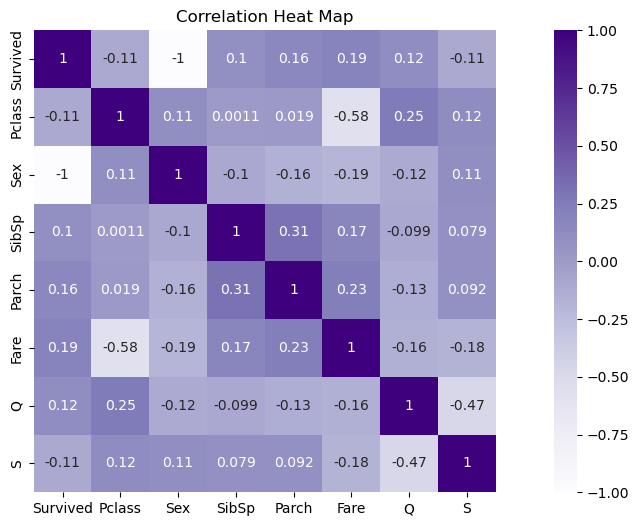

In [20]:
plt.rcParams['figure.figsize'] = 15,6
sns.heatmap(df.corr(), annot = True, square = True, cbar = True, cmap = 'Purples')
plt.title('Correlation Heat Map')
plt.savefig('Correlation Heat Map.png')
plt.show()

_**Plotting the Bar Graph with count of `Survived` passengers and identify the number of passengers who survived and saving the PNG File**_

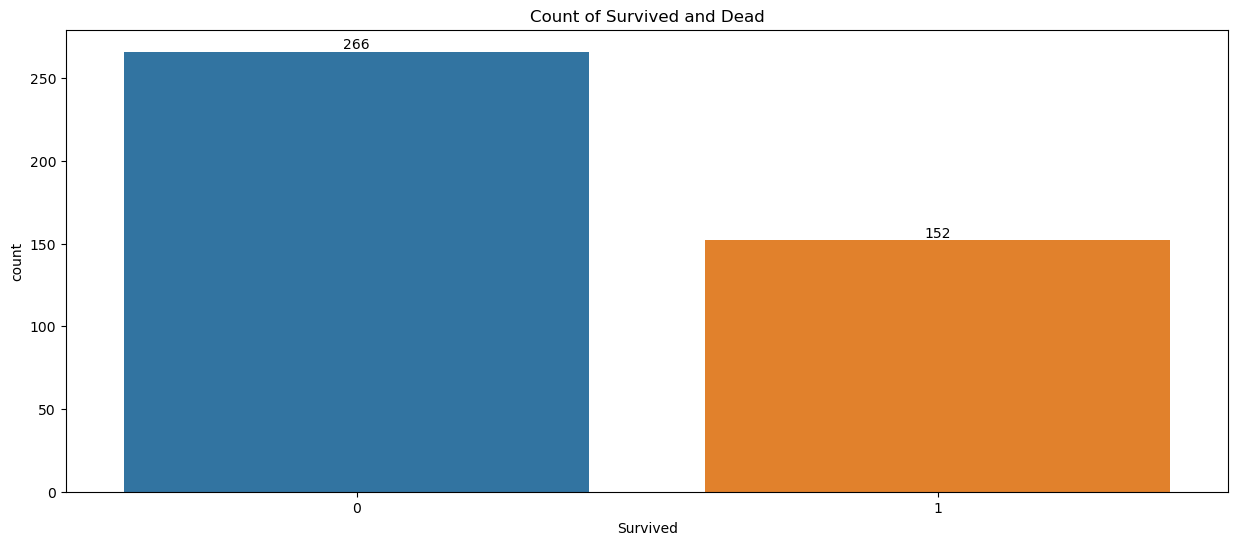

In [21]:
plot = sns.countplot(x = df['Survived'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Survived and Dead')    
plt.savefig('Count of Survived and Dead.png')
plt.show()

_**Plotting the Bar Graph with count of passengers travelled in the various class with their gender count got from `Pclass`, `Sex` column and identifying the gender of the passenger travelled in the different passenger classes from the DataFrame and saving the PNG File**_

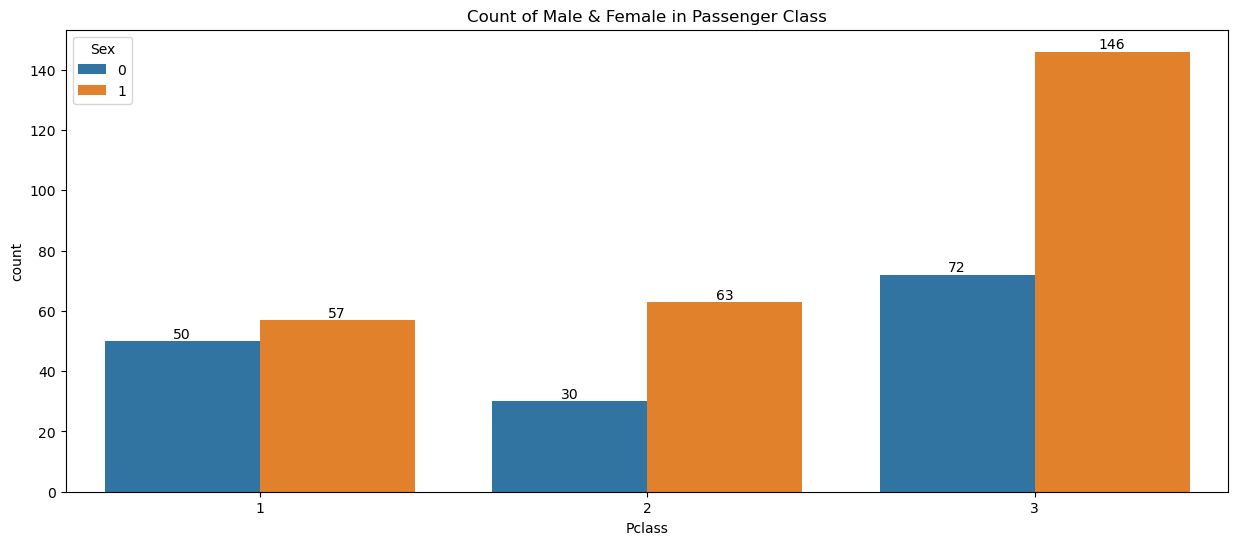

In [22]:
plot = sns.countplot(x = df['Pclass'],hue = df['Sex'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.title('Count of Male & Female in Passenger Class')
plt.savefig('Count of Male & Female in Passenger Class.png')
plt.show()

_**Plotting the Bar Graph with count of `Age` of passenger and identify all the age groups of passengers travelled in the Titanic and saving the PNG File**_

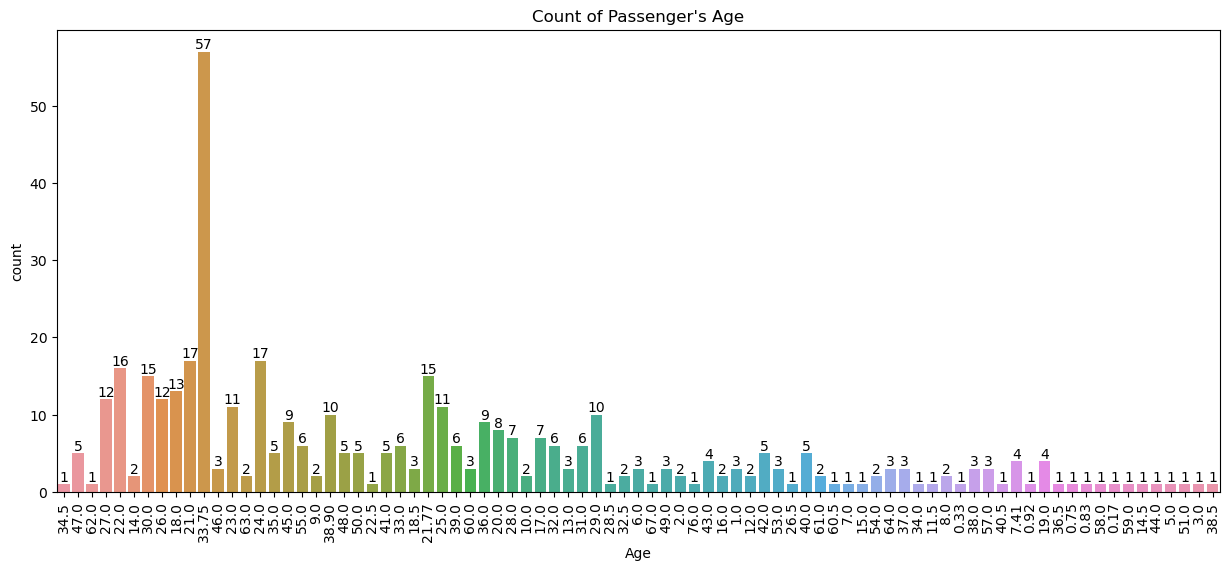

In [23]:
plot = sns.countplot(x = df['Age'])
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                 ha = 'center',va = 'center',xytext = (0,5),textcoords = 'offset points')
plt.xticks(rotation = 90)
plt.title("Count of Passenger's Age")
plt.savefig("Count of Passenger's Age.png")
plt.show()

_**Assigning the dependent and independent variable. In the independent variable along with the dependent variable column also dropping `Sex` column since the correlation heat map shows negative correlation in the `Sex` column from the DataFrame**_

In [24]:
x = df.drop(['Sex','Survived'], axis = 1)
y = df['Survived']

## Data Preprocessing

_**Standardizing the independent variable of the DataFrame using MinMaxScaler function**_

In [25]:
MM = MinMaxScaler()
x = MM.fit_transform(x)

## Model Fitting

_**Defining the Function for the ML algorithms using <span style="color:purple">RandomizedSearchCV</span> Algorithm and splitting the dependent variable & independent variable into training and test dataset and Predicting the Dependent Variable by fitting the given model and create the pickle file of the model with the given Algo_name. Further getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map**_

In [26]:
def Fitmodel(x, y, algo_name, algorithm, params, cv):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 16)
    RSC = RandomizedSearchCV(algorithm, params, n_iter = 100, scoring = 'accuracy', n_jobs = -1, cv = cv, verbose = 0)
    model = RSC.fit(x_train, y_train)
    pred = model.predict(x_test)
    best_params = model.best_params_
    best_estimator = model.best_estimator_
    pickle.dump(model, open(algo_name,'wb'))
    cm = confusion_matrix(pred, y_test)
    print('Algorithm Name : ',algo_name,'\n')
    print('Best Params : ',best_params,'\n')
    print('Best Estimator : ',best_estimator,'\n')
    print('Percentage of Accuracy Score : {0:.2f} %'.format(100*(accuracy_score(y_test,pred))),'\n')
    print('Classification Report : \n',classification_report(y_test,pred))
    print('Confusion Matrix : \n',cm,'\n')
    plt.figure(figsize = (3,3))
    sns.heatmap(cm, annot = True, cbar = True, square = True)
    plt.show()

_**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Logistic Regression </span> </span> model doesn't need any special parameters and fitting the Logistic Regression Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name Logistic Regression**_

Algorithm Name :  Logistic Regression 

Best Params :  {} 

Best Estimator :  LogisticRegression() 

Percentage of Accuracy Score : 72.62 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.93      0.83        59
           1       0.60      0.24      0.34        25

    accuracy                           0.73        84
   macro avg       0.67      0.59      0.58        84
weighted avg       0.70      0.73      0.68        84

Confusion Matrix : 
 [[55 19]
 [ 4  6]] 



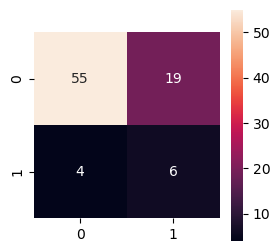

In [27]:
params = {}
Fitmodel(x,y,'Logistic Regression',LogisticRegression(), params, cv = 10)

_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> SVC </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name SVC**_

Algorithm Name :  SVC 

Best Params :  {'kernel': 'rbf', 'gamma': 1, 'C': 10} 

Best Estimator :  SVC(C=10, gamma=1) 

Percentage of Accuracy Score : 71.43 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80        59
           1       0.52      0.44      0.48        25

    accuracy                           0.71        84
   macro avg       0.65      0.64      0.64        84
weighted avg       0.70      0.71      0.71        84

Confusion Matrix : 
 [[49 14]
 [10 11]] 



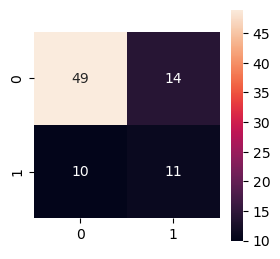

In [28]:
params = {'C' : [0.1, 1, 10, 100],
          'gamma' : [0.001,0.01,0.1,1],
         'kernel' : ['rbf', 'linear']}
Fitmodel(x,y,'SVC',SVC(),params,cv = 10)

_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> KNeighbors Classifier </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name KNeighbors**_

Algorithm Name :  KNeighbors 

Best Params :  {'p': 2, 'n_neighbors': 10} 

Best Estimator :  KNeighborsClassifier(n_neighbors=10) 

Percentage of Accuracy Score : 64.29 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        59
           1       0.39      0.36      0.37        25

    accuracy                           0.64        84
   macro avg       0.56      0.56      0.56        84
weighted avg       0.63      0.64      0.64        84

Confusion Matrix : 
 [[45 16]
 [14  9]] 



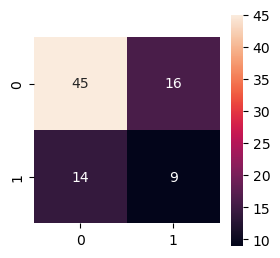

In [29]:
params = {'n_neighbors' : [5,10,15,20,25,30,35,40],
           'p' : [1,2]}
Fitmodel(x,y,'KNeighbors',KNeighborsClassifier(), params, cv = 10)

_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Decision Tree Classifier </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name Decision Tree**_

Algorithm Name :  Decision Tree 

Best Params :  {'splitter': 'best', 'max_features': 'auto', 'criterion': 'entropy'} 

Best Estimator :  DecisionTreeClassifier(criterion='entropy', max_features='auto') 

Percentage of Accuracy Score : 67.86 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        59
           1       0.47      0.60      0.53        25

    accuracy                           0.68        84
   macro avg       0.64      0.66      0.64        84
weighted avg       0.71      0.68      0.69        84

Confusion Matrix : 
 [[42 10]
 [17 15]] 



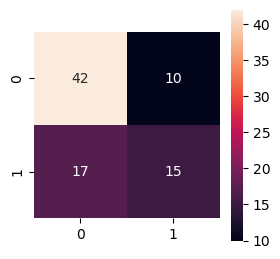

In [30]:
params = {'criterion' : ['gini','entropy'],
          'max_features' : ['auto','sqrt'],
          'splitter' : ['best','random']}
Fitmodel(x,y,'Decision Tree',DecisionTreeClassifier(),params, cv = 10)

_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Random Forest Classifier </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name Random Forest**_

Algorithm Name :  Random Forest 

Best Params :  {'n_estimators': 333, 'max_features': 'auto', 'criterion': 'entropy'} 

Best Estimator :  RandomForestClassifier(criterion='entropy', n_estimators=333) 

Percentage of Accuracy Score : 69.05 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.69      0.76        59
           1       0.49      0.68      0.57        25

    accuracy                           0.69        84
   macro avg       0.66      0.69      0.66        84
weighted avg       0.73      0.69      0.70        84

Confusion Matrix : 
 [[41  8]
 [18 17]] 



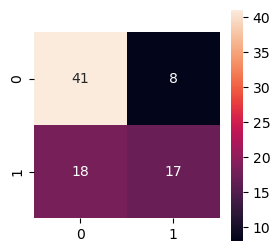

In [31]:
params = {'n_estimators' : [111,222,333,444,555],
          'criterion' : ['entropy','gini'],
          'max_features' : ['auto','sqrt']}
Fitmodel(x,y,'Random Forest',RandomForestClassifier(), params, cv = 10)

_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> Extra Trees Classifier </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name Extra Trees Classifier**_

Algorithm Name :  Extra Trees Classifier 

Best Params :  {'n_estimators': 333, 'max_features': 'sqrt', 'criterion': 'entropy'} 

Best Estimator :  ExtraTreesClassifier(criterion='entropy', max_features='sqrt', n_estimators=333) 

Percentage of Accuracy Score : 71.43 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79        59
           1       0.52      0.64      0.57        25

    accuracy                           0.71        84
   macro avg       0.67      0.69      0.68        84
weighted avg       0.74      0.71      0.72        84

Confusion Matrix : 
 [[44  9]
 [15 16]] 



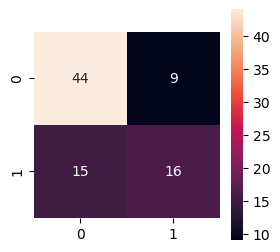

In [32]:
params = {'n_estimators' : [111,222,333,444,555],
          'criterion' : ['entropy','gini'],
          'max_features' : ['auto','sqrt']}
Fitmodel(x,y,'Extra Trees Classifier',ExtraTreesClassifier(),params, cv = 10)

_**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Gaussian Naive Bayes </span> </span> model doesn't need any special parameters and fitting the Gaussian Naive Bayes Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name GaussianNB**_

Algorithm Name :  GaussianNB 

Best Params :  {} 

Best Estimator :  GaussianNB() 

Percentage of Accuracy Score : 78.57 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85        59
           1       0.67      0.56      0.61        25

    accuracy                           0.79        84
   macro avg       0.75      0.72      0.73        84
weighted avg       0.78      0.79      0.78        84

Confusion Matrix : 
 [[52 11]
 [ 7 14]] 



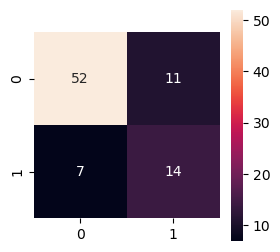

In [33]:
params = {}
Fitmodel(x,y,'GaussianNB',GaussianNB(),params, cv = 10)

_**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Bernoulli Naive Bayes </span> </span> model doesn't need any special parameters and fitting the Bernoulli Naive Bayes Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name BernoulliNB**_

Algorithm Name :  BernoulliNB 

Best Params :  {} 

Best Estimator :  BernoulliNB() 

Percentage of Accuracy Score : 69.05 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.85      0.79        59
           1       0.47      0.32      0.38        25

    accuracy                           0.69        84
   macro avg       0.61      0.58      0.59        84
weighted avg       0.66      0.69      0.67        84

Confusion Matrix : 
 [[50 17]
 [ 9  8]] 



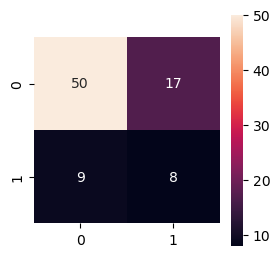

In [34]:
params = {}
Fitmodel(x,y,'BernoulliNB',BernoulliNB(),params, cv = 10)

_**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> Multinomial Naive Bayes </span> </span> model doesn't need any special parameters and fitting the Multinomial Naive Bayes Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name MultinomialNB**_

Algorithm Name :  MultinomialNB 

Best Params :  {} 

Best Estimator :  MultinomialNB() 

Percentage of Accuracy Score : 67.86 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.70      0.95      0.81        59
           1       0.25      0.04      0.07        25

    accuracy                           0.68        84
   macro avg       0.47      0.49      0.44        84
weighted avg       0.57      0.68      0.59        84

Confusion Matrix : 
 [[56 24]
 [ 3  1]] 



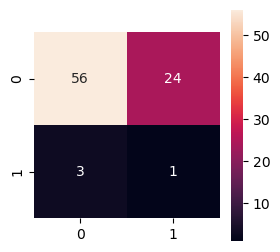

In [35]:
params = {}
Fitmodel(x,y,'MultinomialNB',MultinomialNB(),params, cv = 10)

_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> XGB Classifier </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name XGB Classifier**_

Algorithm Name :  XGB Classifier 

Best Params :  {'n_estimators': 444} 

Best Estimator :  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=444, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) 

Percentage of Accuracy Score : 70.24 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.7

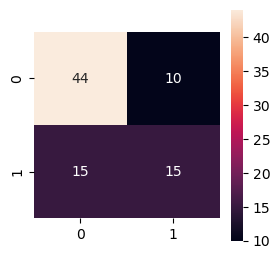

In [36]:
params = {'n_estimators' : [111,222,333,444,555]}
Fitmodel(x,y,'XGB Classifier',XGBClassifier(),params,cv = 10)

_**Running the function with some appropriate parameters and fitting the <span style = 'background : green'><span style = 'color : white'> CatBoost Classifier </span> </span> Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name CatBoost**_

Algorithm Name :  CatBoost 

Best Params :  {'verbose': 0} 

Best Estimator :  <catboost.core.CatBoostClassifier object at 0x0000021CA09F27F0> 

Percentage of Accuracy Score : 75.00 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        59
           1       0.58      0.60      0.59        25

    accuracy                           0.75        84
   macro avg       0.70      0.71      0.70        84
weighted avg       0.75      0.75      0.75        84

Confusion Matrix : 
 [[48 10]
 [11 15]] 



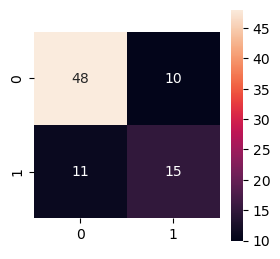

In [37]:
params = {'verbose' : [0]}
Fitmodel(x,y,'CatBoost', CatBoostClassifier(),params, cv = 10)

_**Running the function with empty parameters since the <span style = 'background : green'><span style = 'color : white'> LightGBM Classifier </span> </span> model doesn't need any special parameters and fitting the LightGBM Classifier\ Algorithm and getting the Algorithm Name, Best Parameters of the algorithm, Best Estimators of the fitted model, Percentage of Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset.Further visualising the confusion matrix through Seaborn Heat Map and also creating the pickle file with the name LightGBM**_

Algorithm Name :  LightGBM 

Best Params :  {} 

Best Estimator :  LGBMClassifier() 

Percentage of Accuracy Score : 73.81 % 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80        59
           1       0.55      0.68      0.61        25

    accuracy                           0.74        84
   macro avg       0.70      0.72      0.71        84
weighted avg       0.76      0.74      0.75        84

Confusion Matrix : 
 [[45  8]
 [14 17]] 



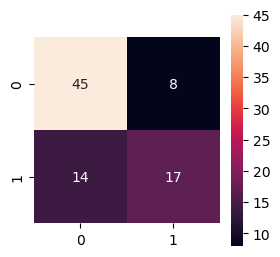

In [38]:
params = {}
Fitmodel(x,y,'LightGBM',LGBMClassifier(),params, cv = 10)

_**Loading the pickle file with the algorithm which gives highest accuracy score**_

In [39]:
model = pickle.load(open('GaussianNB','rb'))

_**For Further Predictions, use the model loaded with the pickle file**_